# AIFrenz_Data_EDA_Forecasting
### ※ 목적 :
1. 저가의 센서로 대전의 19곳의 온도(Y)를 단기간에 측정하여,
2. 기상청의 관측 데이터(X)와의 상관관계 모델을 만들고,
3. 이후엔 생성된 모델을 통해 온도를 추정(Forecasting)하여, 서비스하기 위함. 

# 목차
1. [데이터로딩](#1.데이터로딩)
2. [EDA 및 상관관계 분석](#2.EDA-및-상관관계-분석)
3. [특징추출](#3.특징추출(Feature-Engineering))
4. [모델링](#4.모델링)

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

# 1.데이터로딩

[▲처음으로 돌아가기](#목차)

In [2]:
train_ = pd.read_csv("../input/train.csv" ,encoding="cp949")
test_ = pd.read_csv("../input/test.csv" ,encoding="cp949")

In [3]:
# 데이터 재저장
train = train_
test = test_

In [4]:
train.head(3)

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,...,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
0,0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,...,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0,NaN
1,1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,...,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0,NaN
2,2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,...,6.5,7.5,6.5,8.0,9.5,9.5,8.5,7.5,8.5,NaN


In [5]:
train.tail(3)

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,...,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
4749,4749,19.7,987.7,0.9,0.6,0.0,1006.9,987.6,21.4,1007.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.5
4750,4750,19.4,987.7,0.9,0.8,0.0,1006.9,987.8,21.3,1007.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.5
4751,4751,19.1,987.6,1.0,0.3,0.0,1006.8,987.8,21.2,1007.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0


# 2.EDA 및 상관관계 분석
- EDA : Exploratory Data Analysis; 탐색적 데이터 분석

[▲처음으로 돌아가기](#목차)

In [6]:
print( "트레이닝 셋 (행, 열) :", train.shape )
print( train.columns, "\n" )

print( "테스트 셋 (행, 열) :", test.shape )
print( test.columns )

트레이닝 셋 (행, 열) : (4752, 60)
Index(['id', 'X00', 'X01', 'X02', 'X03', 'X04', 'X05', 'X06', 'X07', 'X08',
       'X09', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18',
       'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28',
       'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38',
       'X39', 'Y00', 'Y01', 'Y02', 'Y03', 'Y04', 'Y05', 'Y06', 'Y07', 'Y08',
       'Y09', 'Y10', 'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16', 'Y17', 'Y18'],
      dtype='object') 

테스트 셋 (행, 열) : (11520, 41)
Index(['id', 'X00', 'X01', 'X02', 'X03', 'X04', 'X05', 'X06', 'X07', 'X08',
       'X09', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18',
       'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28',
       'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38',
       'X39'],
      dtype='object')


### 1. Train셋과 Test셋에 대한 결측치 확인

In [7]:
# Train셋 X에 대한 결측치 값 확인
train_X_null = train.iloc[:,1:41].isnull().sum()

if train_X_null.sum() == 0 :
    print("Train셋 X값에는 결측치(null) 이/가 없습니다. \n")
else :
    print("Train셋 X값에는 결측치(null) 이/가 있습니다.")
    print( train_X_null , "\n")

# Train셋 Y에 대한 결측치 값 확인
train_Y_null = train.iloc[:,41:].isnull().sum()
if train_Y_null.sum() == 0 :
    print("Train셋 Y값에는 결측치(null) 이/가 없습니다. \n")
else :
    print("Train셋 Y값에는 결측치(null) 이/가 있습니다.")
    print( train_Y_null , "\n" )

# Test셋 X에 대한 결측치 값 확인
test_X_null = test.isnull().sum()
if test_X_null.sum() == 0 :
    print("Test셋 X값에는 결측치(null) 이/가 없습니다. \n")
else :
    print("Test셋 X값에는 결측치(null) 이/가 있습니다.")
    print( test_X_null , "\n")

Train셋 X값에는 결측치(null) 이/가 없습니다. 

Train셋 Y값에는 결측치(null) 이/가 있습니다.
Y00     432
Y01     432
Y02     432
Y03     432
Y04     432
Y05     432
Y06     432
Y07     432
Y08     432
Y09     432
Y10     432
Y11     432
Y12     432
Y13     432
Y14     432
Y15     432
Y16     432
Y17     432
Y18    4320
dtype: int64 

Test셋 X값에는 결측치(null) 이/가 없습니다. 



### 2. 데이터셋에서 필요한 열만 분리

In [8]:
# 주변 지역의 기상청의 공공데이터(30일간 이후 3일간 측정, 총 33일)
temperature    = ["X00","X07","X28","X31","X32"] # 기온
local_press    = ["X01","X06","X22","X27","X29"] # 현지기압
wind_speed     = ["X02","X03","X18","X24","X26"] # 풍속
acc_rainfall   = ["X04","X10","X21","X36","X39"] # 누적강수량
sea_pressure   = ["X05","X08","X09","X23","X33"] # 해면기압
acc_solar      = ["X11","X14","X16","X19","X34"] # 누적일사량
humidity       = ["X12","X20","X30","X37","X38"] # 습도
wind_direction = ["X13","X15","X17","X25","X35"] # 풍향
X_all = list(train.columns[1:41]) 

In [9]:
# 대전지역에서 측정한 실내외 19곳의 센서데이터
y_all = ['Y00', 'Y01', 'Y02', 'Y03', 'Y04', 'Y05', 'Y06',
          'Y07', 'Y08','Y09', 'Y10', 'Y11', 'Y12',
          'Y13', 'Y14', 'Y15', 'Y16', 'Y17', 'Y18']
train[y_all].head()

,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
0,12.5,11.5,11.0,20.0,20.0,10.5,10.0,10.5,10.0,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0,NaN
1,12.5,11.0,11.0,20.0,20.0,10.0,9.5,10.0,9.5,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0,NaN
2,12.0,11.0,11.0,19.5,19.5,10.0,9.0,10.0,9.0,6.5,7.5,6.5,8.0,9.5,9.5,8.5,7.5,8.5,NaN
3,12.0,11.0,11.0,19.5,19.5,9.5,9.0,9.5,9.0,6.0,7.0,6.0,8.0,9.5,9.0,8.5,7.5,8.5,NaN
4,12.0,10.5,10.5,19.0,19.5,9.5,8.5,9.5,8.5,6.0,7.0,6.0,7.5,9.5,9.0,8.5,7.5,8.5,NaN


In [10]:
train[y_all].tail()

,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
4747,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.5
4748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.5
4749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.5
4750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.5
4751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0


Text(0.5, 1.0, 'Original dist Y18 / row length : 432')

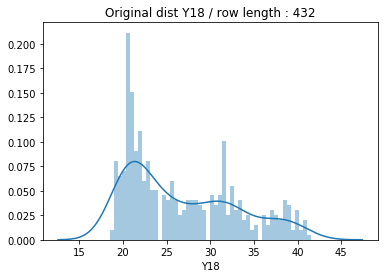

In [11]:
sns.distplot(train['Y18'], bins=50) # y18분포
plt.title('Original dist Y18 / row length : {}'.format(len(train['Y18'].dropna())))

### 3. Y00 ~ Y18(온도센서데이터)에 대한 EDA와 상관관계 분석

In [12]:
# plot 사이즈
fig0 = (5, 5)
fig1 = (10, 5)
fig2 = (10, 10)
fig3 = (20, 10)
fig4 = (20, 20)

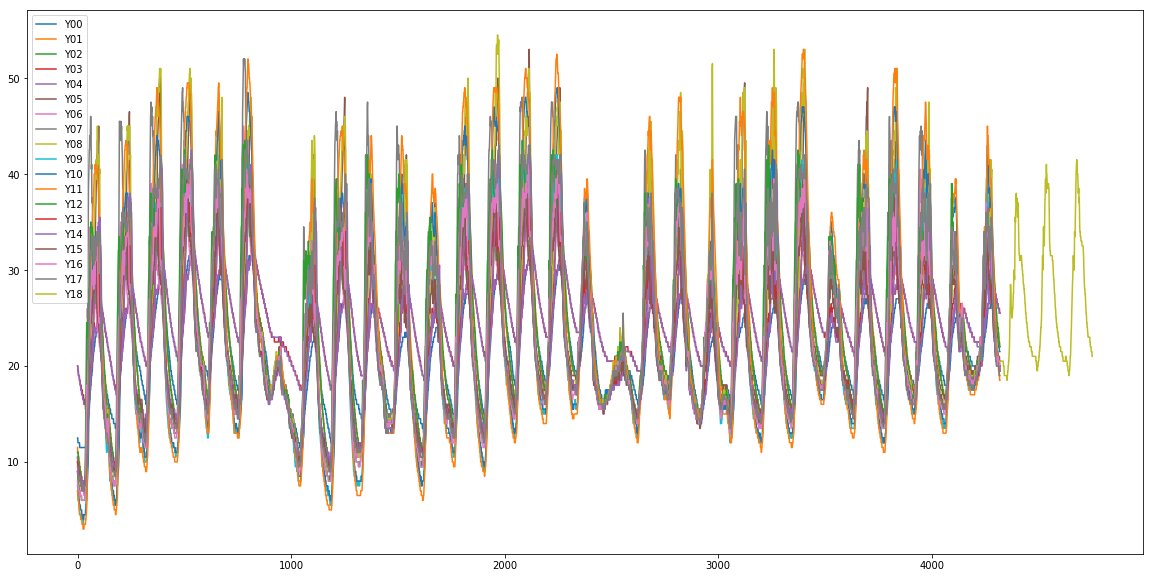

In [13]:
# 각 Y00부터 Y18에 대한 plot
train.loc[:,y_all].plot(figsize=fig3)
plt.show()

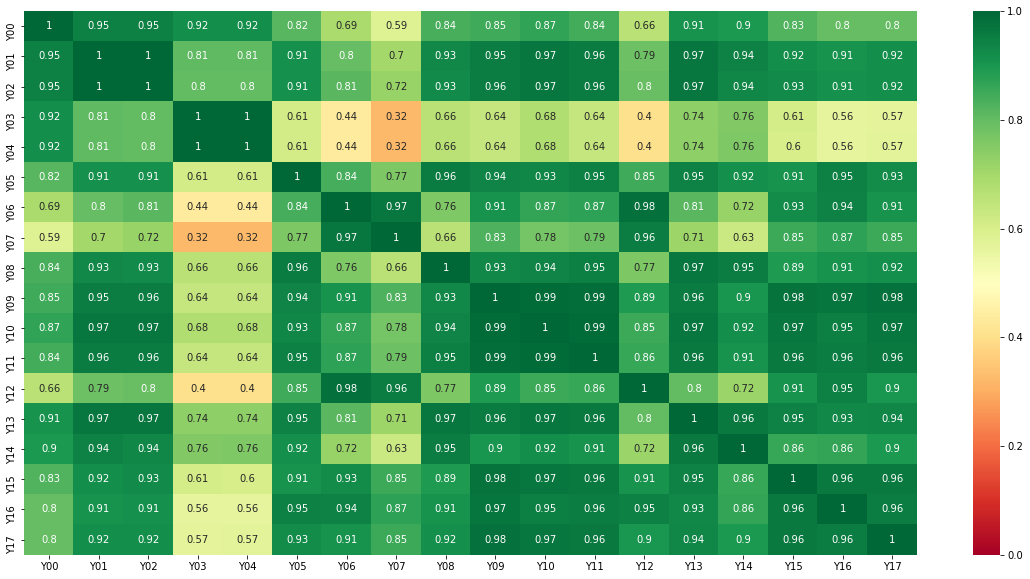

In [14]:
# Y00 ~ Y17 상관관계 분석
y_00_17 = y_all[:-1]

corr = train[y_00_17].corr()

plt.figure(figsize=fig3)
sns.heatmap(corr, cmap = "RdYlGn", annot = True, vmin=0, vmax=1) 

> 꽤나 높은 상관관계가 있음!

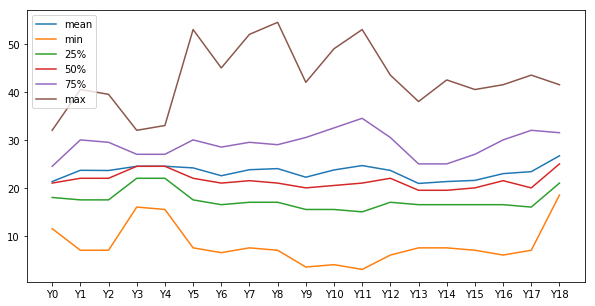

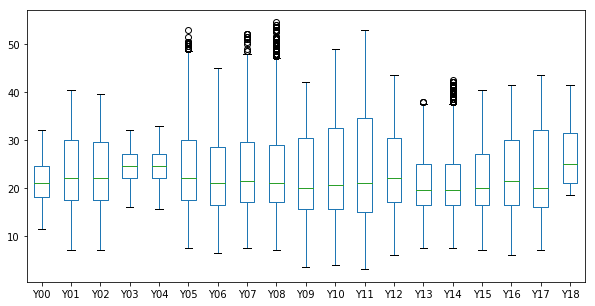

In [15]:
# 중심위치 선정 : 각 y값마다 기술통계 값을 내고, 그것을 plot으로 그려, 모델에 가장 영향을 적게주는 중심위치 선택      
y_desc = pd.DataFrame(train.loc[:,y_all].describe().drop(index=['count','std'])).T
y_desc.plot(figsize=fig1)

y_l = ["Y{}".format(i) for i in range(0, 19)]
plt.xticks([i for i in range(len(y_l))], y_l)

train.loc[:, y_all].plot.box(figsize=fig1)

> 이상값이 존재하므로 모델에 부정적 영향이 적은 것은 평균보다는 중앙값. <br>
대전 Y18 지역의 온도를, Y00부터 Y17의 중앙값으로 결정하여 새롭게 데이터프레임에 저장하기로 함.

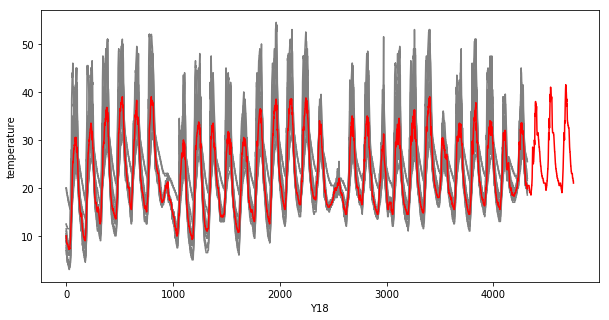

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,...,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
0,0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,...,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0,10.00
1,1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,...,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0,9.50
2,2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,...,6.5,7.5,6.5,8.0,9.5,9.5,8.5,7.5,8.5,9.25
3,3,9.4,988.9,1.5,0.7,0.0,1009.2,989.6,12.0,1010.0,...,6.0,7.0,6.0,8.0,9.5,9.0,8.5,7.5,8.5,9.00
4,4,9.2,988.9,0.8,1.7,0.0,1009.2,989.7,12.0,1010.1,...,6.0,7.0,6.0,7.5,9.5,9.0,8.5,7.5,8.5,8.75


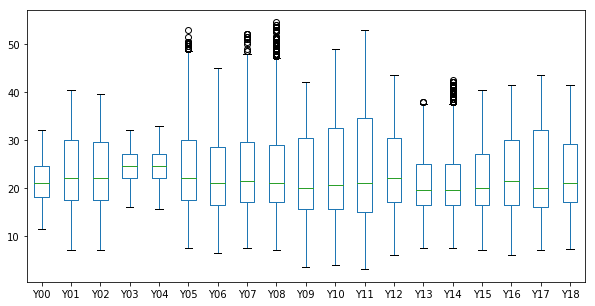

In [16]:
train_temp_median = train.loc[:, y_all].median(axis=1) #y00~y17의 중앙값
train_temp_median
train["Y18"] = train_temp_median # y18의 30일치 결측치에, y00~y17의 중앙값을 추가

plt.figure(figsize=fig1)
plt.plot(train[y_00_17], 'gray') #y00 ~ y17까지의 plot : 회색
plt.plot(train["Y18"],'red') #y18의 plot : 빨강색
plt.xlabel("Y18")
plt.ylabel("temperature")
plt.show()

train.loc[:, y_all].plot.box(figsize=fig1)

train.head(5)

> 종속변수인 Y18에 이상값이 없음을 확인함.

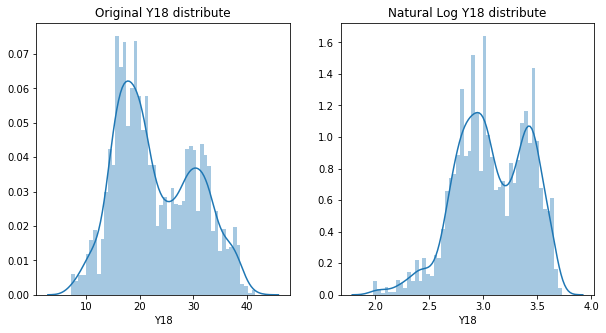

orig왜도 :  0.32198560366838763
orig첨도 :  -0.8729851699578117

log왜도 :  -0.3001793989583819
log첨도 :  -0.3702066131420576


In [17]:
plt.figure(figsize=fig1)

# Y18분포 확인
plt.subplot(1,2,1)
sns.distplot(train['Y18'], bins=50)
plt.title('Original Y18 distribute')

# Y18분포 확인
plt.subplot(1,2,2)
sns.distplot(np.log(train['Y18']), bins=50)
plt.title('Natural Log Y18 distribute')
plt.show()

print("orig왜도 : ",train['Y18'].skew())
print("orig첨도 : ",train['Y18'].kurt()), print()

print("log왜도 : ",np.log(train['Y18']).skew())
print("log첨도 : ",np.log(train['Y18']).kurt())


> Kline(2005)은 왜도의 기준을 절대값 3을 초과하지 않고, 첨도는 절대값 8또는 10을 초과하지 않으면 정규분포로 볼 수 있다고 제시함.

> 자연로그를 취해도 분포형태가 비슷하므로 Original Y18 데이터를 그대로 이용하기로 함

### 4. X00 ~ X39에 대한 EDA와 상관관계 분석

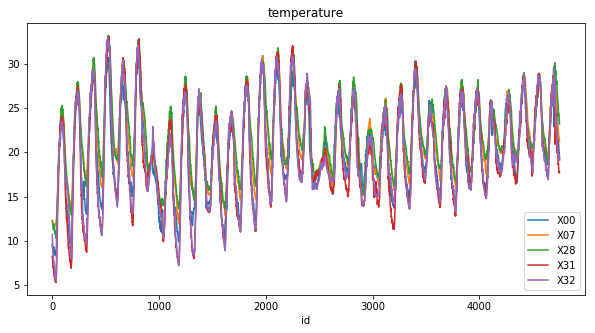

            X00        X07        X28        X31        X32
mean  20.227904  21.658081  22.079040  19.846528  20.012984
std    4.707570   4.377216   4.225203   5.520259   5.271630
50%   19.900000  21.200000  21.700000  19.400000  19.600000 



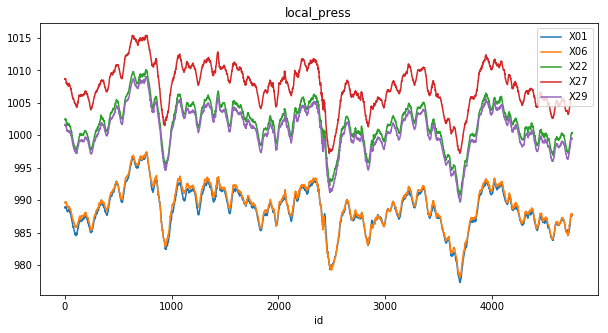

             X01         X06          X22          X27          X29
mean  988.621107  989.005093  1001.773190  1007.554924  1000.811932
std     3.359916    3.403714     3.367735     3.446475     3.390206
50%   988.600000  989.100000  1001.900000  1007.700000  1000.900000 



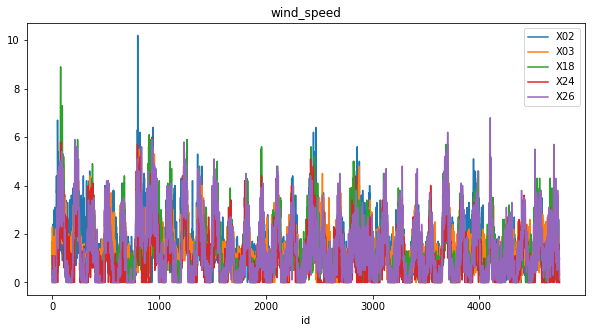

           X02       X03       X18       X24       X26
mean  1.509764  1.453157  1.377462  0.985059  1.369886
std   1.071858  0.936151  1.155024  1.091314  1.240900
50%   1.300000  1.300000  1.000000  0.700000  1.100000 



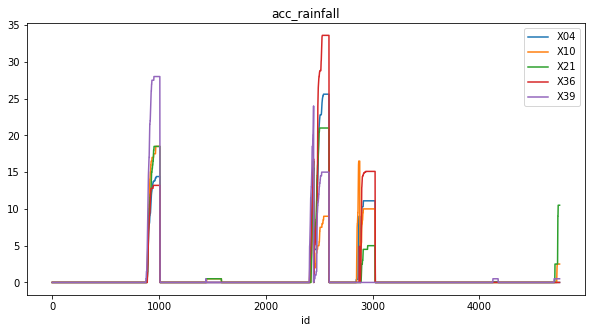

           X04       X10       X21       X36       X39
mean  1.270223  1.006734  1.138363  1.533817  1.083123
std   4.429852  3.324415  4.079039  5.578607  4.617366
50%   0.000000  0.000000  0.000000  0.000000  0.000000 



In [18]:
train.plot(x="id", y=temperature, figsize=fig1, title="temperature")
plt.show()
print ( train[temperature].describe().drop(index=['count','min','25%','75%','max']) ,"\n" )

train.plot(x="id", y=local_press, figsize=fig1, title="local_press")
plt.show()
print ( train[local_press].describe().drop(index=['count','min','25%','75%','max']) ,"\n"  )

train.plot(x="id", y=wind_speed, figsize=fig1, title="wind_speed")
plt.show()
print ( train[wind_speed].describe().drop(index=['count','min','25%','75%','max']) ,"\n"  )

train.plot(x="id", y=acc_rainfall, figsize=fig1, title="acc_rainfall")
plt.show()
print ( train[acc_rainfall].describe().drop(index=['count','min','25%','75%','max']) ,"\n"  )

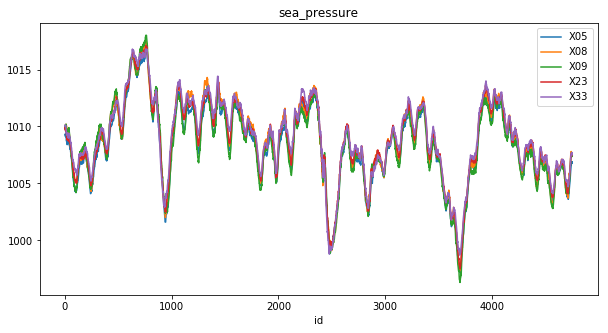

              X05          X08          X09          X23          X33
mean  1008.333902  1008.790341  1008.394171  1008.850989  1009.074747
std      3.395037     3.520317     3.546180     3.417633     3.440669
50%   1008.500000  1008.800000  1008.400000  1008.900000  1009.200000 



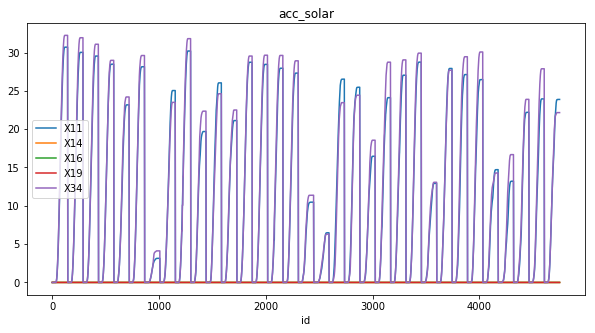

            X11  X14  X16  X19        X34
mean  11.008479  0.0  0.0  0.0  11.567563
std   10.873539  0.0  0.0  0.0  11.386727
50%    7.690000  0.0  0.0  0.0   8.210000 



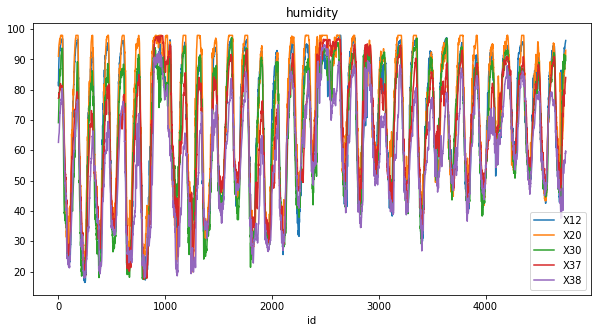

            X12        X20        X30        X37        X38
mean  68.209827  71.478872  65.657639  65.918771  58.178704
std   22.278053  21.830446  21.525699  19.527173  18.368285
50%   72.150000  74.200000  69.400000  67.300000  59.100000 



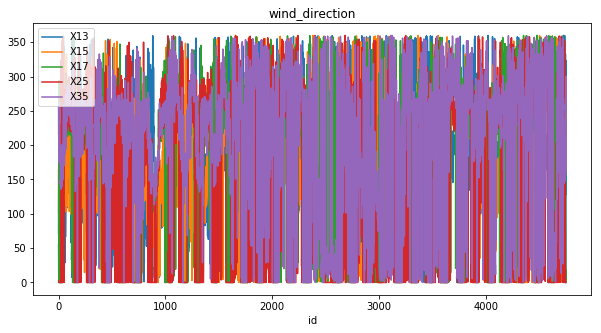

             X13         X15         X17         X25         X35
mean  161.357639  174.346654  161.823864  139.524453  208.400505
std    98.787460   97.785811  115.943382  131.438036   99.580562
50%   182.600000  170.250000  190.450000  134.150000  240.850000 



In [19]:
train.plot(x="id", y=sea_pressure, figsize=fig1, title="sea_pressure")
plt.show()
print ( train[sea_pressure].describe().drop(index=['count','min','25%','75%','max']) ,"\n"  )

train.plot(x="id", y=acc_solar, figsize=fig1, title="acc_solar")
plt.show()
print ( train[acc_solar].describe().drop(index=['count','min','25%','75%','max']) ,"\n"  )

train.plot(x="id", y=humidity, figsize=fig1, title="humidity")
plt.show()
print ( train[humidity].describe().drop(index=['count','min','25%','75%','max']) ,"\n"  )

train.plot(x="id", y=wind_direction, figsize=fig1, title="wind_direction")
plt.show()
print ( train[wind_direction].describe().drop(index=['count','min','25%','75%','max']) ,"\n"  )

 > 온도 : X00, X31, X32이 서로 비슷하고, X07, X28이 서로 비슷함
 
 > 현지기압 : X01, X06이 서로 비슷하고. X22, X29가 서로 비슷하고, X27이 가장 높음.

 > 풍속 : X24가 가장 느리고, X02, X03이 서로 비슷하고 이전보다 빠르며, X18, X26이 서로 비슷하고 이전보다 빠르다.
 
 > 누적강수량 : 평균이 모두 다름

 > 해면기압 : 크게 차이 없음.
 
 > 일일 누적 일사량 : X11, X34가 제일 많고, 나머지 변수는 0임.
 
 > 습도 : 대부분 비슷하나 X20이 가장 높고, X38이 가장 낮음
 
 > 누적강수량 : X25가 가장 낮고, X13, X17이 서로 비슷하며, X15, X35 순으로 많음.

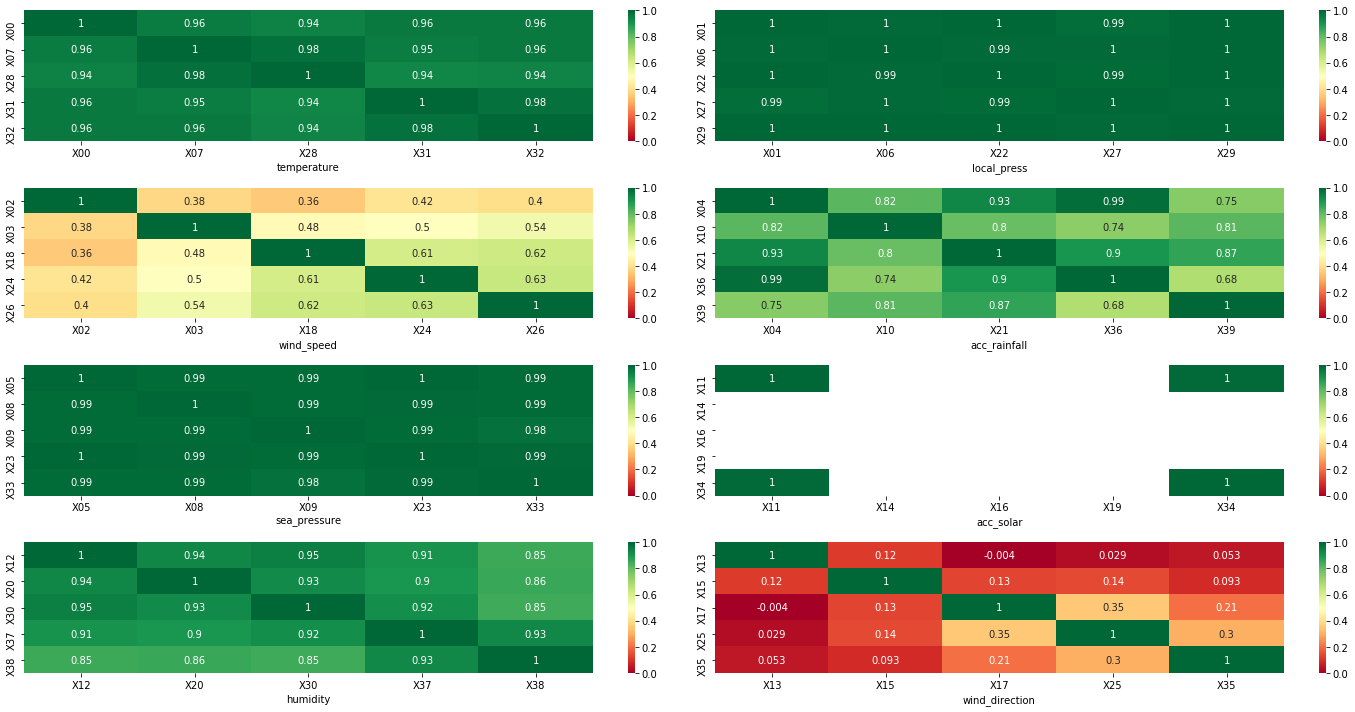

In [20]:
# X00 ~ X39 상관관계 분석 시각화 히트맵
plt.figure(figsize=fig3)

plt.subplot(4,2,1)
corr = train[temperature].corr() #온도
sns.heatmap(corr, cmap = "RdYlGn", annot = True, vmin=0, vmax=1) 
plt.xlabel("temperature")

plt.subplot(4,2,2)
corr = train[local_press].corr() #현지기압
sns.heatmap(corr, cmap = "RdYlGn", annot = True, vmin=0, vmax=1)
plt.xlabel("local_press")

plt.subplot(4,2,3)
corr = train[wind_speed].corr() #풍속
sns.heatmap(corr, cmap = "RdYlGn", annot = True, vmin=0, vmax=1)
plt.xlabel("wind_speed")

plt.subplot(4,2,4)
corr = train[acc_rainfall].corr() # 강수량
sns.heatmap(corr, cmap = "RdYlGn", annot = True, vmin=0, vmax=1)
plt.xlabel("acc_rainfall")

plt.subplot(4,2,5)
corr = train[sea_pressure].corr() #해면기압
sns.heatmap(corr, cmap = "RdYlGn", annot = True, vmin=0, vmax=1)
plt.xlabel("sea_pressure")

plt.subplot(4,2,6)
corr = train[acc_solar].corr() #일조량
sns.heatmap(corr, cmap = "RdYlGn", annot = True, vmin=0, vmax=1)
plt.xlabel("acc_solar")

plt.subplot(4,2,7)
corr = train[humidity].corr() #습도
sns.heatmap(corr, cmap = "RdYlGn", annot = True, vmin=0, vmax=1)
plt.xlabel("humidity")

plt.subplot(4,2,8)
corr = train[wind_direction].corr() #풍향
sns.heatmap(corr, cmap = "RdYlGn", annot = True, vmin=0, vmax=1)
plt.xlabel("wind_direction")

plt.tight_layout()
plt.show()

> X14, X16, X19는 고장난 센서라서 제외해야함

In [21]:
acc_solar = ['X11', 'X34']
X_all.remove('X14')
X_all.remove('X16')
X_all.remove('X19')

> 제외하였음

## 5. 독립변수(X00 ~ X39) 표준화 / 독립변수-종속변수 간 상관관계 분석
- 독립변수 표준화 → 트레이닝, 테스트 데이터셋 변환
> 표준화 : 평균인 0이고, 분산이 1인 데이터로 단위를 변환하는 방식. 변수간의 단위가 통일된다. 0이 기준이라 마이너스값이 나올수도 있음. <br>
> 정규화 : minmax방식을 주로 사용하며, 단위를 0부터 1까지 또는 0부터 100까지로 변환하는 방식. 변수간의 단위가 통일됨.
- 독립변수사이의 상관관계 분석
- 독립변수와 Y18사이의 상관관계분석

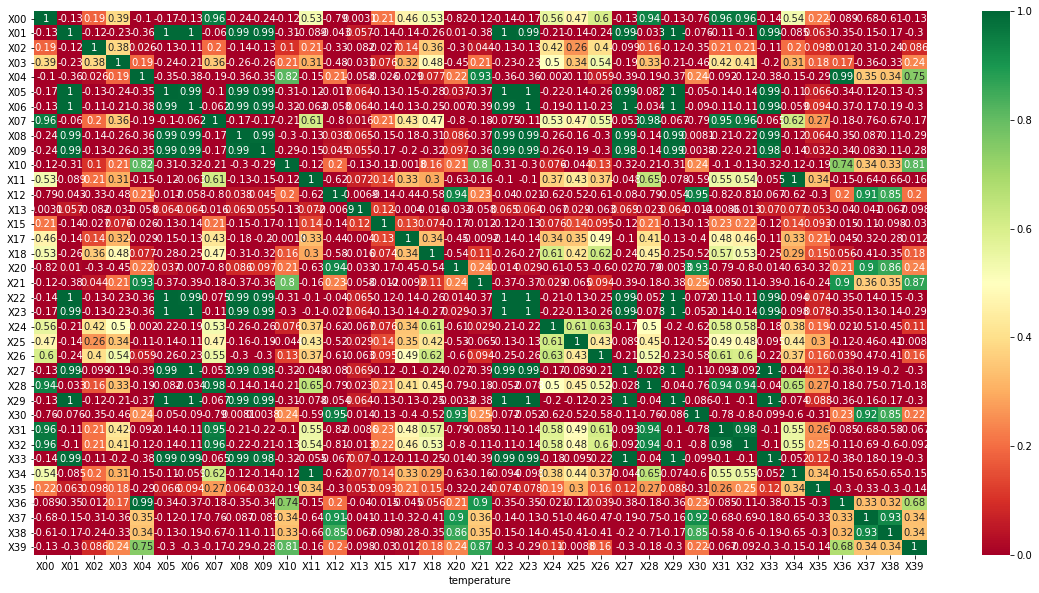

In [22]:
# X 컬럼만 표준화 하는 이유 : 각 독립변수마다 단위가 다르기 때문. 값이나 표준편차가 크면 당연히 영향이 크게 나오고 모델에 문제가 발생
from sklearn.preprocessing import StandardScaler  
StdScaler = StandardScaler()

# 트레이닝 데이터 변환하기, 사용한 스탠다드 스케일러로 테스트 데이터 변환하기
train_X_normed = StdScaler.fit_transform( train[X_all] ) #Array로 변환                                     
test_X_normed = StdScaler.transform(test[X_all])

train_X_normed = pd.DataFrame(columns=X_all, data = train_X_normed) # 컬럼별 N(μ,σ^2)로 변환됩니다.
test_X_normed = pd.DataFrame(columns=X_all, data = test_X_normed)


# X00 ~ X39 상관관계 분석 시각화 히트맵
plt.figure(figsize=fig3)
corr = train_X_normed.corr()
sns.heatmap(corr, cmap = "RdYlGn", annot = True, vmin=0, vmax=1) 
plt.xlabel("temperature")
plt.show()

(4752, 38)


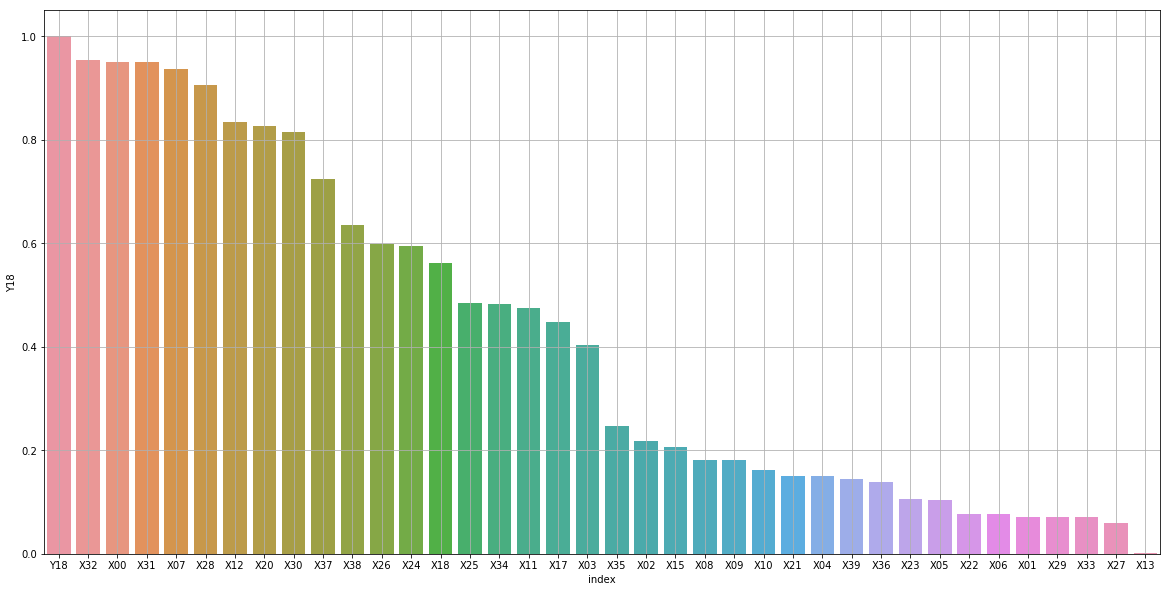

상관계수 30% 이상의 컬럼 :
 ['X32', 'X00', 'X31', 'X07', 'X28', 'X12', 'X20', 'X30', 'X37', 'X38', 'X26', 'X24', 'X18', 'X25', 'X34', 'X11', 'X17', 'X03']


,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,...,X31,X32,X33,X34,X35,X36,X37,X38,X39,Y18
0,-2.236613,0.053249,-0.289028,-0.911441,-0.286772,0.284592,0.174800,-2.160980,0.315249,0.396477,...,-2.110001,-1.766809,0.298012,-1.015988,0.482067,-0.274975,0.577780,0.240728,-0.234601,10.00
1,-2.321591,0.083015,0.177501,0.477370,-0.286772,0.284592,0.174800,-2.183828,0.343658,0.424679,...,-2.091884,-1.842695,0.298012,-1.015988,0.070297,-0.274975,0.582902,0.289731,-0.234601,9.50
2,-2.300347,0.112780,-0.382334,0.904697,-0.286772,0.255134,0.204183,-2.183828,0.372068,0.481083,...,-2.146235,-1.956524,0.268945,-1.015988,0.269152,-0.274975,0.582902,0.311510,-0.234601,9.25


In [23]:
# y18과 독립변수들 간의 상관관계 분석
X_00_39_y18 = pd.concat([train_X_normed, train[['Y18']]], axis=1).dropna().reset_index(drop=True)
print(X_00_39_y18.shape)

# 상관관계가 음수도 있음. Y18열을 절대값 처리하고 내림차순 정렬하여 시각화하면 더 편하게 상관관계를 파악할 수 있음.
corr = X_00_39_y18.corr()
abs_corr_y18 = pd.DataFrame(np.abs(corr['Y18'])).sort_values(by=['Y18'], ascending=False).reset_index()
plt.figure(figsize=fig3)
sns.barplot(x='index', y='Y18', data=abs_corr_y18)
plt.grid()
plt.show()

a = abs_corr_y18[abs_corr_y18['Y18'] >= 0.3]
train_corr30p_columns = list(a.loc[1:,'index'])
test_corr30p_columns = list(a.loc[1:,'index'])
print("상관계수 30% 이상의 컬럼 :\n", train_corr30p_columns )

X_00_39_y18.head(3)

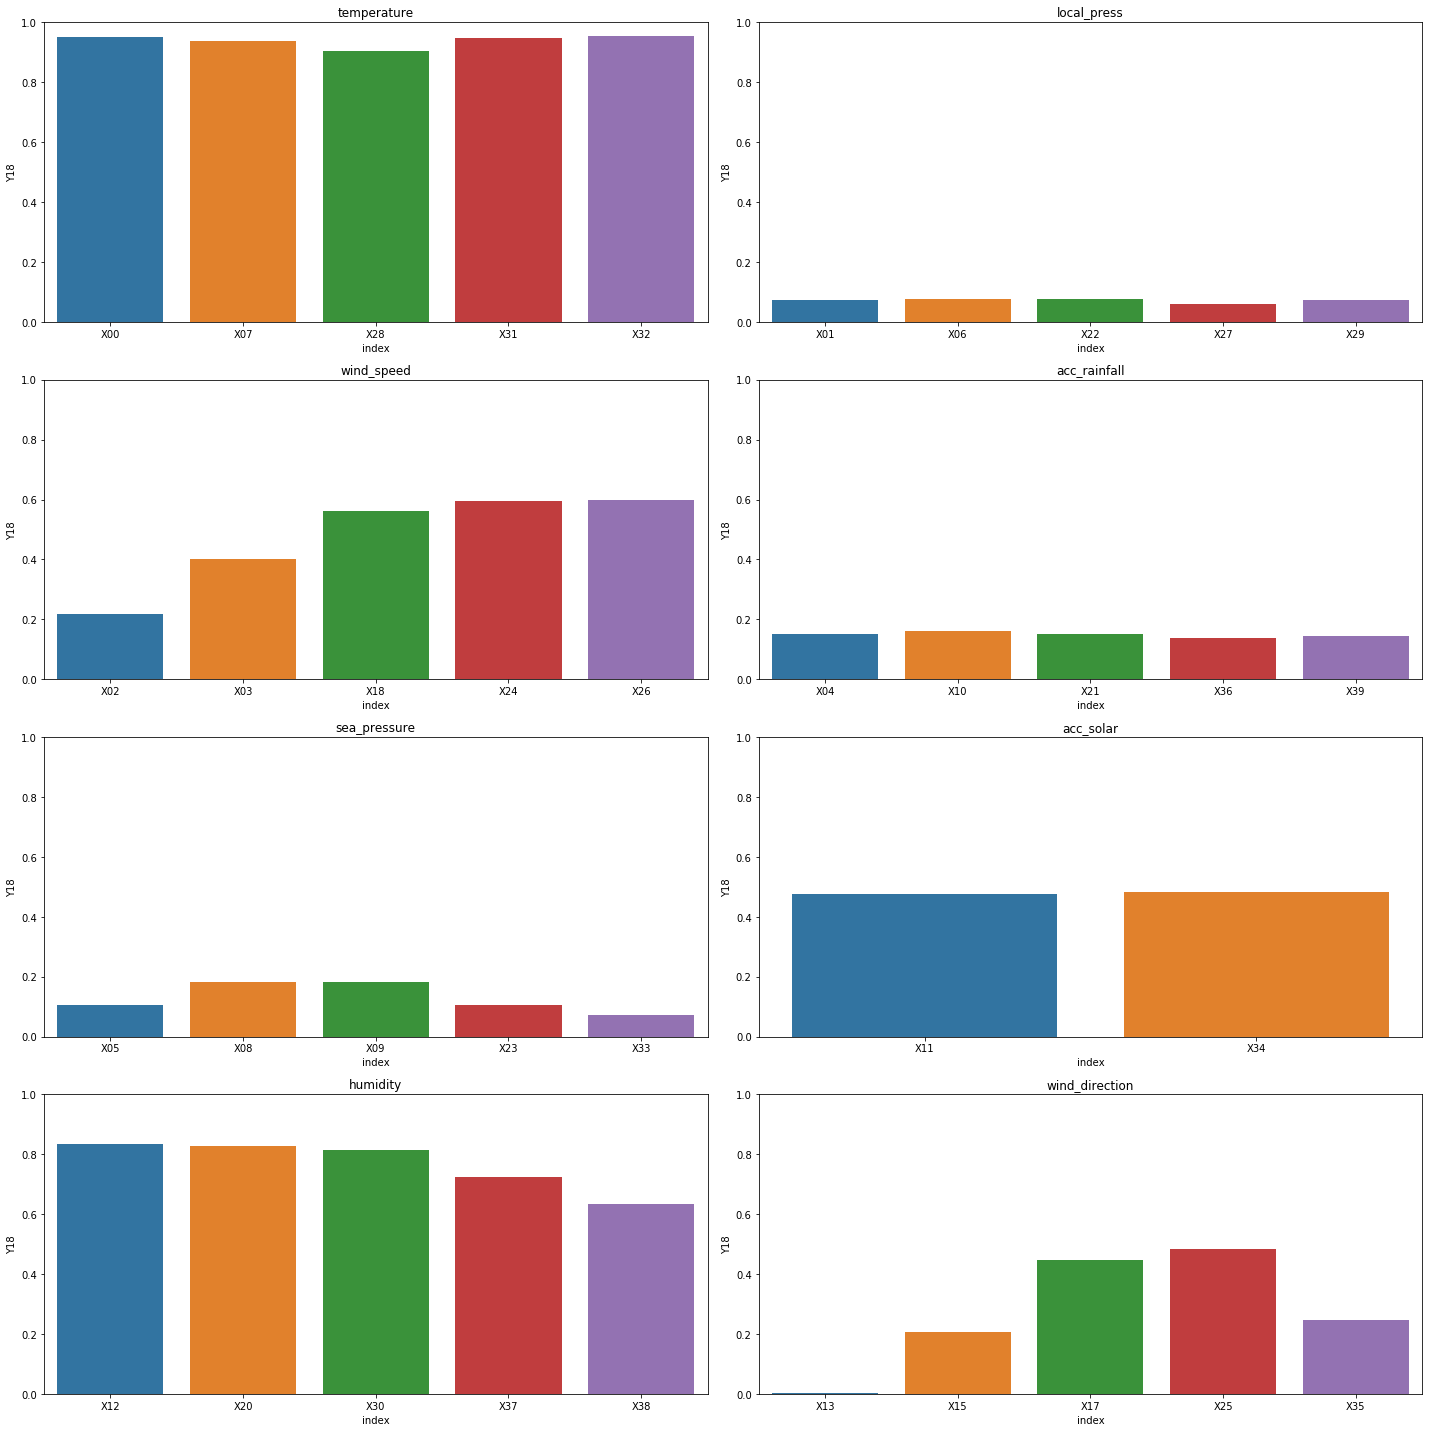

In [24]:
# 특성변수별 상관계수 차트
df = abs_corr_y18.T
df.columns = abs_corr_y18.iloc[:,0]
df = df.drop('index')

plt.figure(figsize=fig4)

plt.subplot(4,2,1)
sns.barplot(x='index', y='Y18',data=df[temperature].T.reset_index()).set(ylim=(0, 1))
plt.title('temperature')

plt.subplot(4,2,2)
sns.barplot(x='index', y='Y18',data=df[local_press].T.reset_index()).set(ylim=(0, 1))
plt.title('local_press')

plt.subplot(4,2,3)
sns.barplot(x='index', y='Y18',data=df[wind_speed].T.reset_index()).set(ylim=(0, 1))
plt.title('wind_speed')

plt.subplot(4,2,4)
sns.barplot(x='index', y='Y18',data=df[acc_rainfall].T.reset_index()).set(ylim=(0, 1))
plt.title('acc_rainfall')

plt.subplot(4,2,5)
sns.barplot(x='index', y='Y18',data=df[sea_pressure].T.reset_index()).set(ylim=(0, 1))
plt.title('sea_pressure')

plt.subplot(4,2,6)
sns.barplot(x='index', y='Y18',data=df[acc_solar].T.reset_index()).set(ylim=(0, 1))
plt.title('acc_solar')

plt.subplot(4,2,7)
sns.barplot(x='index', y='Y18',data=df[humidity].T.reset_index()).set(ylim=(0, 1))
plt.title('humidity')

plt.subplot(4,2,8)
sns.barplot(x='index', y='Y18',data=df[wind_direction].T.reset_index()).set(ylim=(0, 1))
plt.title('wind_direction')

plt.tight_layout()
plt.show()

> 풍속, 해면기압, 습도, 풍향 내의 각각의 변수들이 어느정도 차이를 보임.

# 3.특징추출(Feature Engineering)

[▲처음으로 돌아가기](#목차)

(<matplotlib.axes._subplots.AxesSubplot at 0x21676dfdf98>,
 Text(0.5, 1.0, 'acc_rainfall'))

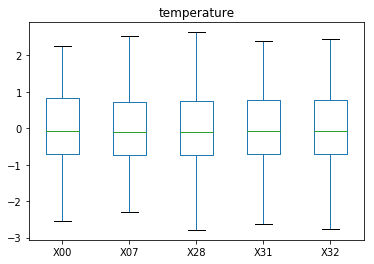

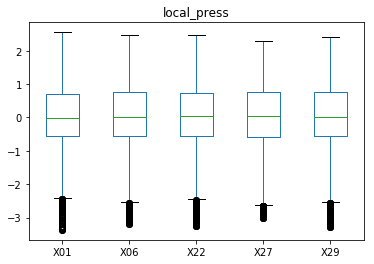

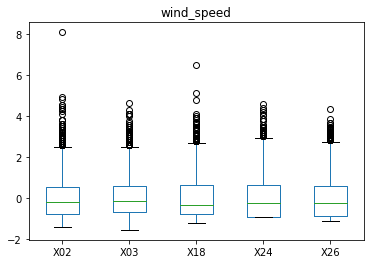

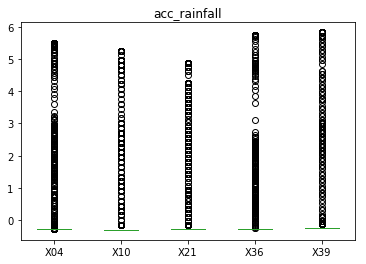

In [25]:
# temperature local_press wind_speed acc_rainfall sea_pressure acc_solar humidity wind_direction
train_X_normed.loc[:,temperature].plot.box(),   plt.title("temperature")
train_X_normed.loc[:,local_press].plot.box(),   plt.title("local_press")
train_X_normed.loc[:,wind_speed].plot.box(),    plt.title("wind_speed")
train_X_normed.loc[:,acc_rainfall].plot.box(),  plt.title("acc_rainfall")

(<matplotlib.axes._subplots.AxesSubplot at 0x2167c0510f0>,
 Text(0.5, 1.0, 'wind_direction'))

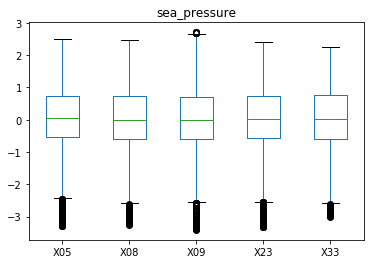

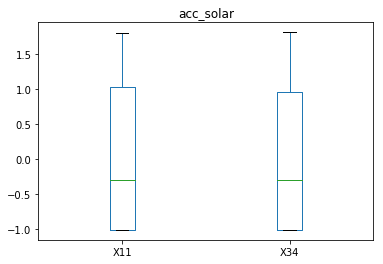

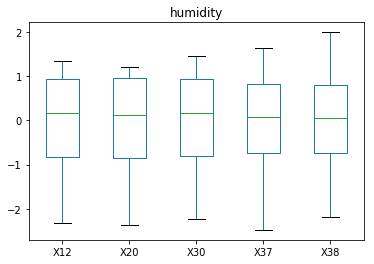

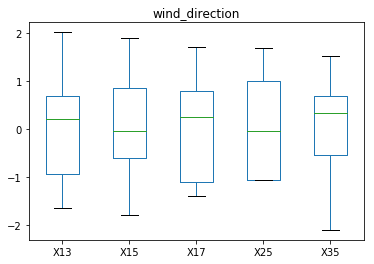

In [26]:
train_X_normed.loc[:,sea_pressure].plot.box(),  plt.title("sea_pressure")
train_X_normed.loc[:,acc_solar].plot.box(), plt.title("acc_solar")
train_X_normed.loc[:,humidity].plot.box(),      plt.title("humidity")
train_X_normed.loc[:,wind_direction].plot.box(),plt.title("wind_direction")

> 누적강수량 관련 변수만 제외하고 <br>
> 나머지 변수들은 그 분포가 매우 비슷하고, 이상값이 분포에 크게 영향을 미치지 않음. 평균처리해도 될 듯함. <br>
> 누적강수량은 drop시켜버리거나 <br>
> 0일때 F / 아닐때는 T로 해보는 것이 좋을 듯함.

In [27]:
# temperature, local_press, wind_speed, acc_rainfall, sea_pressure, acc_solar, humidity, wind_direction

temperature_m = pd.DataFrame(train_X_normed[temperature].mean(axis = 1))
local_press_m = pd.DataFrame(train_X_normed[local_press].mean(axis = 1))
wind_speed_m  = pd.DataFrame(train_X_normed[wind_speed].mean(axis = 1))
acc_rainfall_m  = pd.DataFrame(train_X_normed[acc_rainfall].mean(axis = 1)) #강수량은 drop시키거나 T/F로 변경예정
sea_pressure_m  = pd.DataFrame(train_X_normed[sea_pressure].mean(axis = 1))
acc_solar_m  = pd.DataFrame(train_X_normed[acc_solar].mean(axis = 1))
humidity_m  = pd.DataFrame(train_X_normed[humidity].mean(axis = 1))
wind_direction_m  = pd.DataFrame(train_X_normed[wind_direction].mean(axis = 1))

m_train = pd.concat([train[['Y18']], temperature_m, local_press_m, wind_speed_m, acc_rainfall_m,
              sea_pressure_m, acc_solar_m, humidity_m, wind_direction_m], axis=1).dropna().reset_index(drop=True)
m_train.columns = ["Y18", "temperature_m", "local_press_m", "wind_speed_m", "acc_rainfall_m",
              "sea_pressure_m", "acc_solar_m", "humidity_m", "wind_direction_m"]


temperature_m = pd.DataFrame(test_X_normed[temperature].mean(axis = 1))
local_press_m = pd.DataFrame(test_X_normed[local_press].mean(axis = 1))
wind_speed_m  = pd.DataFrame(test_X_normed[wind_speed].mean(axis = 1))
acc_rainfall_m  = pd.DataFrame(test_X_normed[acc_rainfall].mean(axis = 1)) #강수량은 drop시키거나 T/F로 변경예정
sea_pressure_m  = pd.DataFrame(test_X_normed[sea_pressure].mean(axis = 1))
acc_solar_m  = pd.DataFrame(test_X_normed[acc_solar].mean(axis = 1))
humidity_m  = pd.DataFrame(test_X_normed[humidity].mean(axis = 1))
wind_direction_m  = pd.DataFrame(test_X_normed[wind_direction].mean(axis = 1))

m_test = pd.concat([temperature_m, local_press_m, wind_speed_m, acc_rainfall_m,
              sea_pressure_m, acc_solar_m, humidity_m, wind_direction_m], axis=1).dropna().reset_index(drop=True)
m_test.columns = ["temperature_m", "local_press_m", "wind_speed_m", "acc_rainfall_m",
              "sea_pressure_m", "acc_solar_m", "humidity_m", "wind_direction_m"]


# 강수량 drop
# 이유? 아래의 랜덤포레스트 모델로 특징중요도를 뽑아본 결과, 모델에 영향을 거의 주지 않아 drop시켰음.
m_train = m_train.drop(['acc_rainfall_m'], axis=1)
m_test = m_test.drop(['acc_rainfall_m'], axis=1)
m_train.tail()


,Y18,temperature_m,local_press_m,wind_speed_m,sea_pressure_m,acc_solar_m,humidity_m,wind_direction_m
4747,21.5,-0.042965,-0.392587,-0.543959,-0.384486,1.057107,0.807826,0.557689
4748,21.5,-0.053209,-0.398526,-0.606534,-0.390378,1.057107,0.834687,0.162850
4749,21.5,-0.067222,-0.386610,-0.799835,-0.378675,1.057107,0.836516,0.215772
4750,21.5,-0.098570,-0.374857,-0.773221,-0.361498,1.057107,0.853850,0.186579
4751,21.0,-0.113031,-0.380946,-0.965296,-0.372898,1.057107,0.870569,-0.761348


# 4.모델링
- 현재 시점에서는 모든 X00부터 X39까지 전부 넣은 모델임
- 이후 다음시간에 특징추출해놓은 데이터프레임(m_train, m_test)으로 바꾸어 볼 생각임.

[▲처음으로 돌아가기](#목차)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb # pip install xgboost
import lightgbm as lgb # pip install lightgbm

# https://scikit-learn.org/stable/modules/model_evaluation.html

In [29]:
# 전체 표준화 한 데이터
X_train = X_00_39_y18.iloc[:,:-1]
Y_train = X_00_39_y18.iloc[:,-1]
X_test = test_X_normed

# Feature Engineering 한 데이터
X_train_FE = m_train.iloc[:,1:]
Y_train_FE = m_train.iloc[:,0]
X_test_FE = m_test

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.3, random_state=1)
X_train_FE, X_val_FE, Y_train_FE, Y_val_FE = train_test_split(X_train_FE, Y_train_FE, test_size=0.3, random_state=1)

print("X_train :", X_train.shape)
print("Y_train :", Y_train.shape)
print("X_val :", X_val.shape)
print("Y_val :", Y_val.shape)

print("X_test columns :", X_test.columns)
print("X_test :", X_test.shape)

print("="*70)

print("X_train :", X_train_FE.shape)
print("Y_train :", Y_train_FE.shape)
print("X_val :", X_val_FE.shape)
print("Y_val :", Y_val_FE.shape)

print("X_test columns :", X_test_FE.columns)
print("X_test :", X_test_FE.shape)

X_train : (3326, 37)
Y_train : (3326,)
X_val : (1426, 37)
Y_val : (1426,)
X_test columns : Index(['X00', 'X01', 'X02', 'X03', 'X04', 'X05', 'X06', 'X07', 'X08', 'X09',
       'X10', 'X11', 'X12', 'X13', 'X15', 'X17', 'X18', 'X20', 'X21', 'X22',
       'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32',
       'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39'],
      dtype='object')
X_test : (11520, 37)
X_train : (3326, 7)
Y_train : (3326,)
X_val : (1426, 7)
Y_val : (1426,)
X_test columns : Index(['temperature_m', 'local_press_m', 'wind_speed_m', 'sea_pressure_m',
       'acc_solar_m', 'humidity_m', 'wind_direction_m'],
      dtype='object')
X_test : (11520, 7)


### 전체데이터를 넣었을 때와 Feature Engineering한 데이터를 각각 모델에 적용

### 기초적인 다중선형회귀분석부터 실시해보고, <br> 더 나은 랜덤포레스트, XGBOOST, lightGBM 순으로 학습하였음.

In [30]:
# 예측 대상(target variable)은 Y18

### 1. 다중선형회귀모델

1) 특징추출하지않음

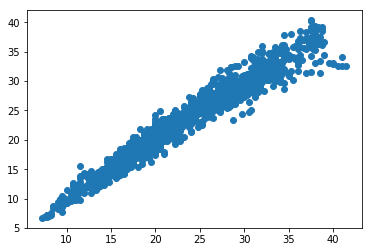

R_Squared : 0.9536511121732936
MSE :  2.4558233884711704
RMSE :  1.5671066933910947


In [31]:
Reg = LinearRegression()
Reg.fit(X_train, Y_train)

y_pred_train_1 = Reg.predict(X_val)
plt.scatter(Y_val, y_pred_train_1)
plt.show()
print("R_Squared :", r2_score(Y_val, y_pred_train_1))
mse = mean_squared_error(Y_val, y_pred_train_1)

print("MSE : ", mse)
print("RMSE : ", mse ** 0.5)

2) 특징추출함

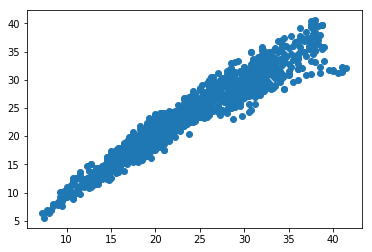

R_Squared : 0.9378352184750506
MSE :  3.2938379229070653
RMSE :  1.8148933640594604


In [32]:
Reg2 = LinearRegression()
Reg2.fit(X_train_FE, Y_train_FE)

y_pred_train_2 = Reg2.predict(X_val_FE)
plt.scatter(Y_val_FE, y_pred_train_2)
plt.show()
print("R_Squared :", r2_score(Y_val_FE, y_pred_train_2))
mse = mean_squared_error(Y_val_FE, y_pred_train_2)

print("MSE : ", mse)
print("RMSE : ", mse ** 0.5)

### 2. 랜덤포레스트회귀모델

1) 특징추출하지않음

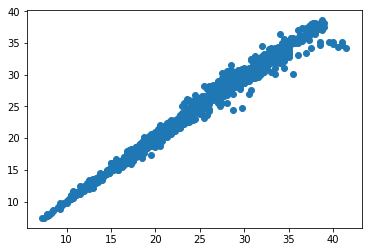

R_Squared : 0.9858461887578648
{'n_estimators': 60, 'min_samples_split': 3, 'max_features': 11, 'max_depth': 16}
MSE :  0.7499481069406257
RMSE :  0.8659954427943751


,f_i,columns
0,22.451172,X31
1,22.208871,X32
2,18.018177,X00
3,14.577911,X07
4,5.257072,X12


In [33]:
RF = RandomForestRegressor()

param_list = {"n_estimators": list(range(10, 100, 10)),
              "max_depth": [4, 8, 12, 16],
              "max_features": list(range(3, 12, 2)),
              "min_samples_split": list(range(3, 12, 2))}

      
RF_random_search = RandomizedSearchCV(estimator=RF,
                                        param_distributions = param_list,
                                        n_iter = 10,
                                        cv = 5,
                                        random_state=1)

RF_random_search.fit(X_train, Y_train)

y_pred_train_3 = RF_random_search.predict(X_val)
plt.scatter(Y_val, y_pred_train_3)
plt.show()
print("R_Squared :", r2_score(Y_val, y_pred_train_3))
print( RF_random_search.best_params_ )

mse = mean_squared_error(Y_val, y_pred_train_3)
print("MSE : ", mse)
print("RMSE : ", mse ** 0.5)

f_i = pd.DataFrame(sorted(zip(RF_random_search.best_estimator_.feature_importances_*100, X_train.columns), reverse=True), columns=['f_i','columns'])
f_i.head(5)

2) 특징추출함

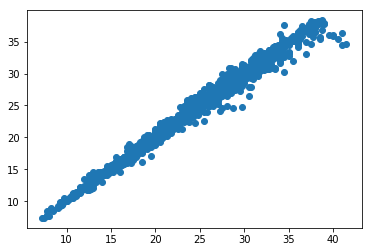

R_Squared : 0.9860148675300462
{'n_estimators': 60, 'min_samples_split': 3, 'max_features': 11, 'max_depth': 16}
MSE :  0.7410105618713537
RMSE :  0.8608197034637124


,f_i,columns
0,50.185778,temperature_m
1,22.038207,humidity_m
2,16.683953,acc_solar_m
3,6.554770,wind_speed_m
4,2.275201,wind_direction_m


In [34]:
RF2 = RandomForestRegressor()

param_list = {"n_estimators": list(range(10, 100, 10)),
              "max_depth": [4, 8, 12, 16],
              "max_features": list(range(3, 9, 2)),
              "min_samples_split": list(range(3, 12, 2))}

      
RF_random_search2 = RandomizedSearchCV(estimator=RF2,
                                        param_distributions = param_list,
                                        n_iter = 10,
                                        cv = 5,
                                        random_state=1)

RF_random_search2.fit(X_train_FE, Y_train_FE)

y_pred_train_4 = RF_random_search2.predict(X_val_FE)
plt.scatter(Y_val_FE, y_pred_train_4)
plt.show()
print("R_Squared :", r2_score(Y_val_FE, y_pred_train_4))
print( RF_random_search.best_params_ )

mse = mean_squared_error(Y_val_FE, y_pred_train_4)
print("MSE : ", mse)
print("RMSE : ", mse ** 0.5)

f_i = pd.DataFrame(sorted(zip(RF_random_search2.best_estimator_.feature_importances_*100, X_train_FE.columns), reverse=True), columns=['f_i','columns'])
f_i.head(5)

### 3. XGBoost회귀모델

1) 특징추출하지않음

[12:02:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:02:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:02:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:02:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:02:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:02:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:02:31] WARNI

[12:03:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


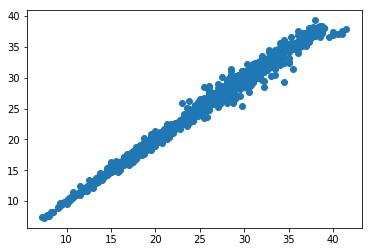

R_Squared : 0.9897349972123347
{'n_estimators': 80, 'min_samples_split': 3, 'max_features': 3, 'max_depth': 16}
MSE :  0.5438972780301469
RMSE :  0.7374939172834898


,f_i,columns
0,53.414093,X32
1,25.870312,X31
2,8.451468,X00
3,6.528317,X39
4,0.944154,X34


In [35]:
XGB = xgb.XGBRegressor()

XGB_random_search = RandomizedSearchCV(estimator=XGB,
                                        param_distributions = param_list,
                                        n_iter = 10,
                                        cv = 5,
                                        random_state=1)

XGB_random_search.fit(X_train, Y_train)

y_pred_train_5 = XGB_random_search.predict(X_val)
plt.scatter(Y_val, y_pred_train_5)
plt.show()
print("R_Squared :", r2_score(Y_val, y_pred_train_5))
print( XGB_random_search.best_params_ )

mse = mean_squared_error(Y_val, y_pred_train_5)
print("MSE : ", mse)
print("RMSE : ", mse ** 0.5)

f_i = pd.DataFrame(sorted(zip(XGB_random_search.best_estimator_.feature_importances_*100, X_train.columns), reverse=True), columns=['f_i','columns'])
f_i.head(5)

2. 특징추출함

[12:03:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:03:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:03:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:03:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:03:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:03:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:03:35] WARNI

[12:03:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


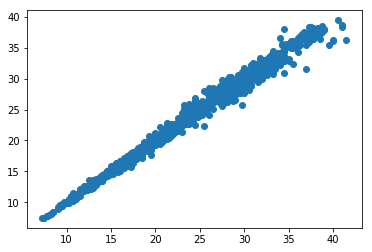

R_Squared : 0.9897783511859816
{'n_estimators': 80, 'min_samples_split': 3, 'max_features': 3, 'max_depth': 16}
MSE :  0.5416001419507814
RMSE :  0.7359348761614586


,f_i,columns
0,90.622505,temperature_m
1,5.712117,acc_solar_m
2,1.863519,humidity_m
3,0.670391,local_press_m
4,0.608504,sea_pressure_m


In [36]:
XGB2 = xgb.XGBRegressor()

XGB_random_search2 = RandomizedSearchCV(estimator=XGB2,
                                        param_distributions = param_list,
                                        n_iter = 10,
                                        cv = 5,
                                        random_state=1)

XGB_random_search2.fit(X_train_FE, Y_train_FE)

y_pred_train_6 = XGB_random_search2.predict(X_val_FE)
plt.scatter(Y_val_FE, y_pred_train_6)
plt.show()
print("R_Squared :", r2_score(Y_val_FE, y_pred_train_6))
print( XGB_random_search.best_params_ )

mse = mean_squared_error(Y_val_FE, y_pred_train_6)
print("MSE : ", mse)
print("RMSE : ", mse ** 0.5)

f_i = pd.DataFrame(sorted(zip(XGB_random_search2.best_estimator_.feature_importances_*100, X_train_FE.columns), reverse=True), columns=['f_i','columns'])
f_i.head(5)

> Feature Engineering을 하든, 하지 않든, <br>
> 적합한 모델을 쓴다면 두 방법 모두 성능이 매우 비슷하다는 사실이 발견됨. <br>

> Feature Engineering의 유무는 성능을 올리는데 영향이 크게 없다.

### 4. lightGBM회귀모델

1) 특징추출하지않음

Training until validation scores don't improve for 100 rounds
[10]	valid_0's l2: 43.7995
[20]	valid_0's l2: 36.2173
[30]	valid_0's l2: 29.9656
[40]	valid_0's l2: 24.8486
[50]	valid_0's l2: 20.6044
[60]	valid_0's l2: 17.1667
[70]	valid_0's l2: 14.3078
[80]	valid_0's l2: 11.9832
[90]	valid_0's l2: 10.0524
[100]	valid_0's l2: 8.4572
[110]	valid_0's l2: 7.15707
[120]	valid_0's l2: 6.07799
[130]	valid_0's l2: 5.18714
[140]	valid_0's l2: 4.44555
[150]	valid_0's l2: 3.83587
[160]	valid_0's l2: 3.32343
[170]	valid_0's l2: 2.90639
[180]	valid_0's l2: 2.55354
[190]	valid_0's l2: 2.26107
[200]	valid_0's l2: 2.0172
[210]	valid_0's l2: 1.81241
[220]	valid_0's l2: 1.63984
[230]	valid_0's l2: 1.49845
[240]	valid_0's l2: 1.37371
[250]	valid_0's l2: 1.26897
[260]	valid_0's l2: 1.1851
[270]	valid_0's l2: 1.10868
[280]	valid_0's l2: 1.04586
[290]	valid_0's l2: 0.991776
[300]	valid_0's l2: 0.945223
[310]	valid_0's l2: 0.903175
[320]	valid_0's l2: 0.865392
[330]	valid_0's l2: 0.831893
[340]	valid_0's l2: 0

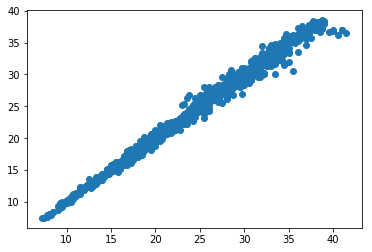

R_Squared : 0.9907995553635649
MSE :  0.48749103121892695
RMSE :  0.6982055794813781


In [37]:
train_ds = lgb.Dataset(X_train, label = Y_train)
val_ds = lgb.Dataset(X_val, label = Y_val)

params = {'learning_rate': 0.01, 'max_depth': 16, 
          'boosting': 'gbdt', 'objective': 'regression', 
          'metric': 'mse', 'is_training_metric': True,
          'num_leaves': 144, 'feature_fraction': 0.9,
          'bagging_fraction': 0.7, 'bagging_freq': 5, 'seed':1}

lgb = lgb.train(params, train_ds, 1000, val_ds, verbose_eval=10, early_stopping_rounds=100)

y_pred_train_7 = lgb.predict(X_val)
plt.scatter(Y_val, y_pred_train_7)
plt.show()
print("R_Squared :", r2_score(Y_val, y_pred_train_7))

mse = mean_squared_error(Y_val, y_pred_train_7)
print("MSE : ", mse)
print("RMSE : ", mse ** 0.5)

2. 특징추출함
 - 현재 적용시킨 lightGBM 함수의 문제점 : '특징추출하지 않은 방법'과 '특징추출한 방법'을,<br> 한 커널에서 각 함수를 초기화시켜 적용시키려 하니, <br> 한 커널에서 2개의 부스팅을 작동시킬수 없다는 에러가 발생하였음. <br><br>
  - 커널을 재실행해서 한번 더 돌려서 결과를 도출함.
 
#### ※ 아래 모델을 작동시키면 반드시 에러가 나오므로 작동시키지 말고 참고용으로만 사용하길 바람

In [38]:
"""
train_ds = lgb.Dataset(X_train_FE, label = Y_train)
val_ds = lgb.Dataset(X_val_FE, label = Y_val)

params = {'learning_rate': 0.01, 'max_depth': 16, 
          'boosting': 'gbdt', 'objective': 'regression', 
          'metric': 'mse', 'is_training_metric': True,
          'num_leaves': 144, 'feature_fraction': 0.9,
          'bagging_fraction': 0.7, 'bagging_freq': 5, 'seed':1}

lgb = lgb.train(params, train_ds, 1000, val_ds, verbose_eval=10, early_stopping_rounds=100)

y_pred_train_8 = lgb.predict(X_val_FE)
plt.scatter(Y_val_FE, y_pred_train_8)
plt.show()
print("R_Squared :", r2_score(Y_val_FE, y_pred_train_8))

mse = mean_squared_error(Y_val_FE, y_pred_train_8)
print("MSE : ", mse)
print("RMSE : ", mse ** 0.5)

"""
# Feature Enginnering LightGBM Model score
# R_Squared : 0.9889807063397092
# MSE :  0.5838638285465223
# RMSE :  0.7641098275421684

'\ntrain_ds = lgb.Dataset(X_train_FE, label = Y_train)\nval_ds = lgb.Dataset(X_val_FE, label = Y_val)\n\nparams = {\'learning_rate\': 0.01, \'max_depth\': 16, \n          \'boosting\': \'gbdt\', \'objective\': \'regression\', \n          \'metric\': \'mse\', \'is_training_metric\': True,\n          \'num_leaves\': 144, \'feature_fraction\': 0.9,\n          \'bagging_fraction\': 0.7, \'bagging_freq\': 5, \'seed\':1}\n\nlgb = lgb.train(params, train_ds, 1000, val_ds, verbose_eval=10, early_stopping_rounds=100)\n\ny_pred_train_8 = lgb.predict(X_val_FE)\nplt.scatter(Y_val_FE, y_pred_train_8)\nplt.show()\nprint("R_Squared :", r2_score(Y_val_FE, y_pred_train_8))\n\nmse = mean_squared_error(Y_val_FE, y_pred_train_8)\nprint("MSE : ", mse)\nprint("RMSE : ", mse ** 0.5)\n\n'

### 5. 서포트벡터회귀모델

In [39]:
# https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html
# 하드마진 벡터머신의 한계 : 데이터가 선형적으로 구분되어야만 작동가능, 이상치에 민감하다.
# 소프트마진 서포트벡터머신을 하기로 함.

1. 특징추출하지않음

In [40]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=0.1, coef0=1)

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']

for i, svr in enumerate(svrs):
    svr.fit(X_train, Y_train)
    y_pred_train_9 = svr.predict(X_val)
    print("SVR_{}_R_Squared :".format(kernel_label[i]), r2_score(Y_val, y_pred_train_9))
    mse = mean_squared_error(Y_val, y_pred_train_9)
    print("SVR_{}_MSE : ".format(kernel_label[i]), mse)
    print("SVR_{}_RMSE : ".format(kernel_label[i]), mse ** 0.5)
    print("="*70)

SVR_RBF_R_Squared : 0.9753225627414293
SVR_RBF_MSE :  1.3075486905687514
SVR_RBF_RMSE :  1.1434809533038806
SVR_Linear_R_Squared : 0.9523361173686994
SVR_Linear_MSE :  2.5254991703133363
SVR_Linear_RMSE :  1.5891819185711045
SVR_Polynomial_R_Squared : 0.9752829949837531
SVR_Polynomial_MSE :  1.3096452117429767
SVR_Polynomial_RMSE :  1.1443973137608183


2. 특징추출함

In [41]:
svr_rbf2 = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_lin2 = SVR(kernel='linear', C=100, gamma='auto')
svr_poly2 = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=0.1, coef0=1)

svrs2 = [svr_rbf2, svr_lin2, svr_poly2]
kernel_label2 = ['RBF', 'Linear', 'Polynomial']
model_color2 = ['m', 'c', 'g']

for i, svr2 in enumerate(svrs2):
    svr2.fit(X_train_FE, Y_train_FE)
    y_pred_train_10 = svr2.predict(X_val_FE)
    print("SVR_{}_R_Squared :".format(kernel_label2[i]), r2_score(Y_val_FE, y_pred_train_10))
    mse = mean_squared_error(Y_val_FE, y_pred_train_10)
    print("SVR_{}_MSE : ".format(kernel_label2[i]), mse)
    print("SVR_{}_RMSE : ".format(kernel_label2[i]), mse ** 0.5)
    print("="*70)

SVR_RBF_R_Squared : 0.9767635828511676
SVR_RBF_MSE :  1.2311953829773346
SVR_RBF_RMSE :  1.1095924400325259
SVR_Linear_R_Squared : 0.9355907158582852
SVR_Linear_MSE :  3.4127642290213847
SVR_Linear_RMSE :  1.8473668366140452
SVR_Polynomial_R_Squared : 0.9632836639043815
SVR_Polynomial_MSE :  1.9454369058373093
SVR_Polynomial_RMSE :  1.394789197634291


## 특징추출 하지않은 lightGBM의 성능(R^2값)이 가장 좋고,
## RMSE가 0에 더 가깝기 때문에 이를 선택하였음.

In [42]:
import numpy as np
def mse_AIFrenz(y_true, y_pred):
    '''
    y_true: 실제 값
    y_pred: 예측 값
    '''
    diff = abs(y_true - y_pred)
    less_then_one = np.where(diff < 1, 0, diff)
    # multi-column일 경우에도 계산 할 수 있도록 np.average를 한번 더 씌움
    score = np.average(np.average(less_then_one ** 2, axis = 0))
    return score

mse_AIFrenz(Y_val , y_pred_train_7) # 특징추출하지않은 lightGBM모델 선택

0.3446682779392472

> 평가지표

Text(0, 0.5, 'temperature')

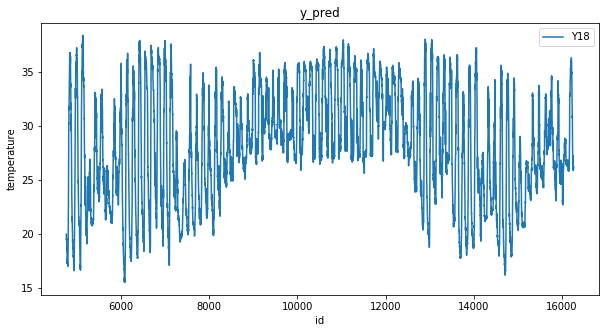

In [43]:
import time
now = time.strftime('%Y-%m-%d_%H;%M;%S', time.localtime(time.time()))

data = lgb.predict(X_test) # 특징추출하지않은 lightGBM모델과 test셋을 가져와서 예측값을 냄
csv_dict = {'id':test['id'], 'Y18':data} # 딕셔너리 화
sub = pd.DataFrame(csv_dict)             # 데이터프레임화

sub.to_csv("../input/{}_submission.csv".format(now),index=False) #저장

sub.plot(x="id", y='Y18', figsize=fig1, title="y_pred")
plt.ylabel("temperature")

[▲처음으로 돌아가기](#목차)